In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [5]:
print(train.shape)
print(test.shape)

(29305, 16)
(19537, 15)


In [6]:
y = train['income']

# 1. EDA

> **어떤 사람이 1년에 벌어들이는 개인 소득이 $50k를 초과하는지 예측해보기**

In [7]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## 변수 탐색

| .  | column         | type   | n-unique   | description                                     | value                                                                                                                                                                                                                                                                                                                                                                                                                           |
|----|----------------|--------|------------|-------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | age            | int    | continuous | 나이                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 2  | workclass      | object | 9          | 직군                                            | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.                                                                                                                                                                                                                                                                                                                          |
| 3  | fnlwgt         | int    | continuous | ?                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 4  | education      | object | 16         | 최종학력                                        | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.                                                                                                                                                                                                                                                                          |
| 5  | education-num  | int    | continuous | 교육년수                                        |                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 6  | marital-status | object | 7          | 결혼 여부                                       | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.                                                                                                                                                                                                                                                                                                                      |
| 7  | occupation     | object | 15         | 직종                                            | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.                                                                                                                                                                                                       |
| 8  | relationship   | object | 6          | 가족관계                                        | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                                                                                                                                                                                                                                                                                                                                                             |
| 9  | race           | object | 5          | 인종                                            | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                                                                                                                                                                                                                                                                                                                                                    |
| 10 | sex            | object | 2          | 성별                                            | Female, Male.                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 11 | capital-gain   | int    | continuous | 토지, 공사채, 주식등의 가격상승으로 생기는 차익 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 12 | capital-loss   | int    | continuous | 토지, 공사채, 주식등의 가격하락으로 생기는 차손 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 13 | hours-per-week | int    | continuous | 주당 근로시간                                   |                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| 14 | native-country | object | 42         | 출신국                                          | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |
| 15 | income         | int    |            | 수입                                            | 50k이상이면 1 아니면 0                                                                                                                                                                                                                                                                                                                                                                                                          |

## 시각화
## 반응변수

## income
- 어떤 사람의 연간 개인 소득이 50k 이상이면 1 아니면 0의 값을 갖는다.

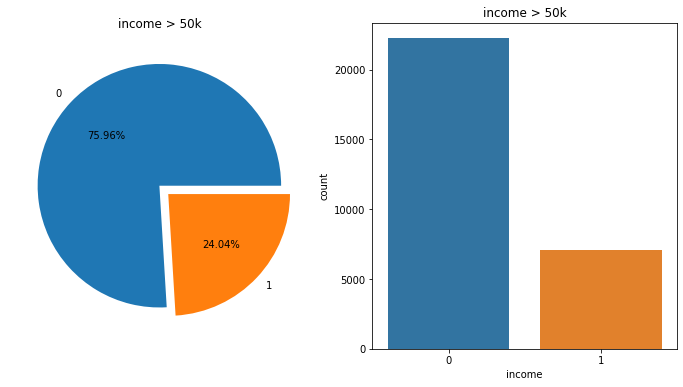

In [9]:
f, ax = plt.subplots(1,2,figsize=(12,6))

train['income'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('income > 50k')
ax[0].set_ylabel('')

sns.countplot('income', data=train, ax=ax[1])
ax[1].set_title('income > 50k')
plt.show()

In [8]:
train['income'].value_counts() 

0    22260
1     7045
Name: income, dtype: int64

> train data 29305개 중 0이 22260개(75.96%), 1이 7045개(24.04%)로
0과 1의 비율이 3:1 인 것을 볼 수 있었습니다.

## 시각화
## 수치형 변수들

### 히트맵

- spearman 상관계수를 사용해서 분석을 했다. -> 두 요소가 같이 증가하는지 감소하는지 여부를 확인 해서 값을 계산했습니다.
- 우리는 상관관계가 높은 education-num (0.33),age(0.24),capital-gain(0.22),hours-per-week(0.23)이 값을 사용하였습니다.

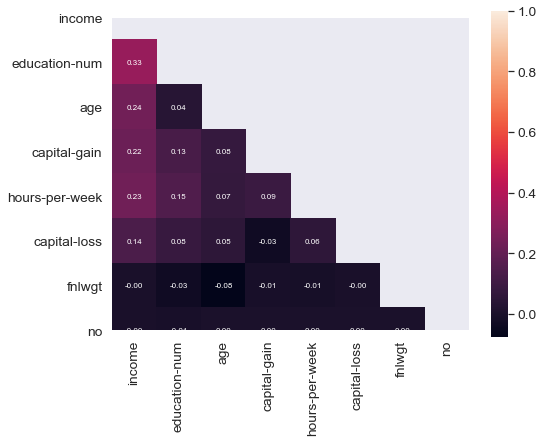

In [31]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = abs(train.corr(method='spearman')) # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'income').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(train[cols].values.T) # correlation 특정 컬럼에 대해서
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))

#Sokratis Kouvaras help to hide upper symmetric metrics
mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

## Age

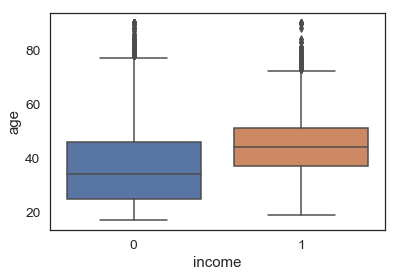

In [95]:
sns.boxplot(train['income'], train['age'])

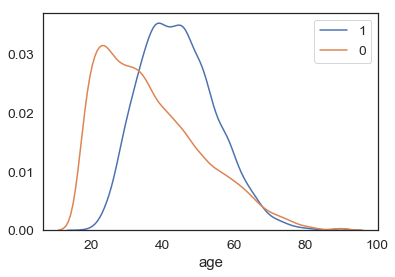

In [96]:
sns.distplot(, hist=False, label='1')
sns.distplot(train['age'][train['income']==0], hist=False, label='0')
plt.legend()


In [55]:
age0 = pd.cut(train['age'][train['income']==0], [-1,10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['10','20', '30','40','50','60','70','80','90', '100']).value_counts().sort_index()
age1 = pd.cut(train['age'][train['income']==1], [-1,10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['10','20', '30','40','50','60','70','80','90', '100']).value_counts().sort_index()

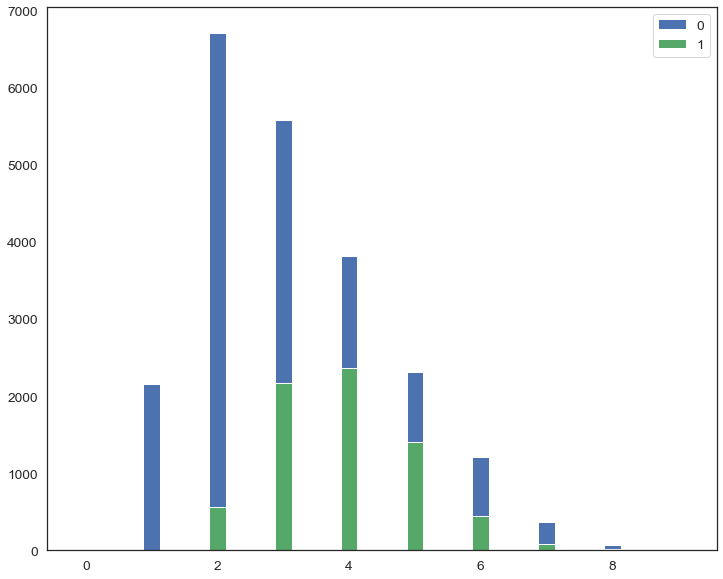

In [59]:
plt.figure(figsize=(12,10))
plt.bar(range(10), age0, color = 'b', width = 0.25, label='0')
plt.bar(range(10), age1, color = 'g', width = 0.25, label='1')
plt.legend()

- 수입이 1인 사람들의 나이가 더 높게 나타난걸 볼 수 있습니다.
- 평균수입이 높은 그룹이 평균 연령도 높다는걸 알 수 있습니다.
- 나이가 높을수록 수입이 50k를 넘을 확률도 높아진다는 사실을 볼 수 있습니다.
- 그로 인해 나이와 수입의 상관관계를 알 수 있습니다.

## fnlwgt (Final Weight)

#### 의미도 모호하고 income과의 상관계수도 낮아 사용하지 않았습니다.

## education-num

In [108]:
data = pd.concat([train['income'], train['education-num']], axis=1)

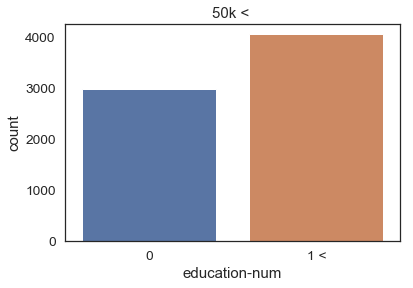

In [109]:
plt.title ("50k < ")
sns.countplot(pd.cut(train['education-num'][(train['income']==1)], [-1,10,100], labels=['0','1 <']))

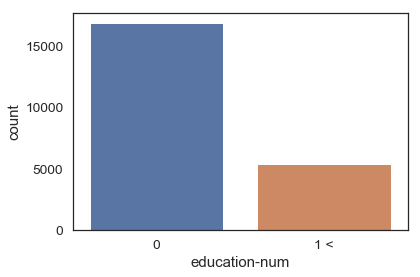

In [110]:
sns.countplot(pd.cut(train['education-num'][(train['income']==0)], [-1,10,100], labels=['0','1 <']))

In [62]:
edu_income = pd.DataFrame([train['education-num'][train['income']==0].value_counts().sort_index(), train['education-num'][train['income']==1].value_counts().sort_index()], index=[0,1])

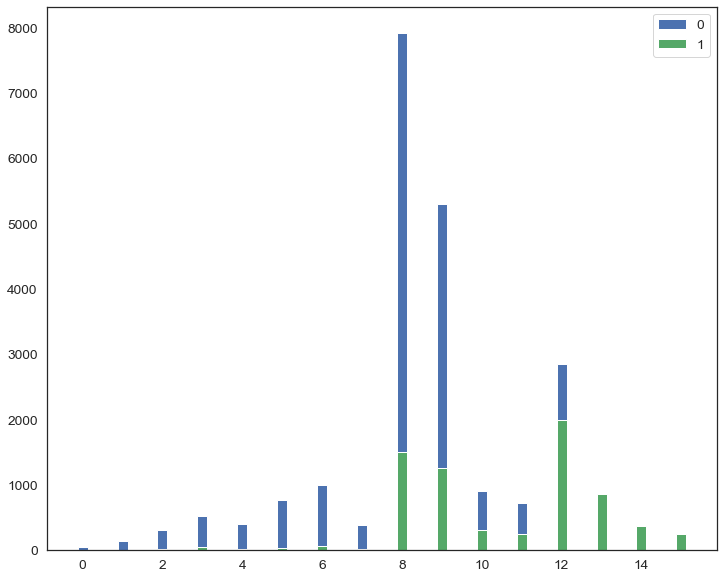

In [77]:
plt.figure(figsize=(12,10))
plt.bar(range(16), edu_income.iloc[0,:], color = 'b', width = 0.25, label='0')
plt.bar(range(16), edu_income.iloc[1,:], color = 'g', width = 0.25, label='1')
plt.legend()

- 8년 이상 공부한 사람들의 그룹부터 소득 50k의 비중이 증가했다
- 대학 진학(10년)을 기준으로 나눠봤더니 대학교를 진학한 사람들의 소득이 50k를 넘은 확률이 높았다.
- -> 학력과 소득의 상관관계가 존재함을 볼 수 있었다. 

## capital-gain 
> 자본적 자산인 토지, 공사채, 주식등의 가격상승으로 생기는 차익	

- 0과 1 이상의 값들을 비교했을때 0의 수가이 월등하게 많아 우리가 원하는 값을 찾을 수 없었습니다. 
- 그래프를 그릴때 0을 제외한 분포도를 그려봤습니다. 

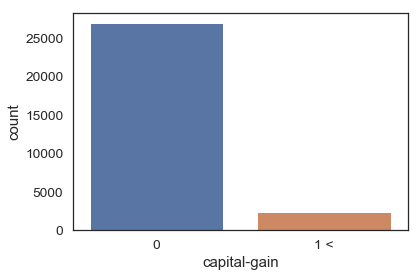

In [98]:
sns.countplot(pd.cut(train['capital-gain'], [-1,0,100000], labels=['0','1 <']))

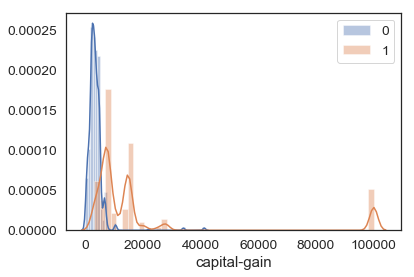

In [99]:
sns.distplot(train['capital-gain'][(train['income']==0) & (train['capital-gain']!=0)], label='0')
sns.distplot(train['capital-gain'][(train['income']==1) & (train['capital-gain']!=0)], label='1')
plt.legend()


- 소득이 50k 미만인 사람들은 capital-gain이 있더라도 높은 값을 갖지 못했고, 50k 이상인 사람들은 아닌 사람들에 비해 더 높은 값을 가진다.
- age와 마찬가지로 0인 사람과 1인 사람들의 확연한 차이가 보이기 때문에 사용했다.  

## Capital-loss
> 자본적 자산인 토지, 공사채, 주식등의 가격하락으로 생기는 차손

- Capital-gain과 마찬가지로 0과 1 이상의 값들을 비교했을때 0의 수가 월등하게 많아 그래프를 통해 값의 분포를 확인하기 어려웠습니다.
- 그래프를 그릴때 0을 제외한 분포도를 그려봤습니다. 


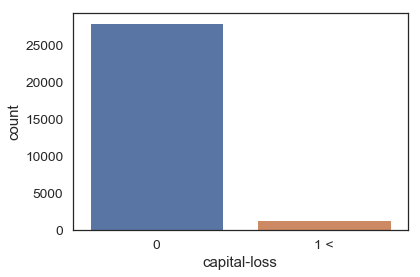

In [100]:
sns.countplot(pd.cut(train['capital-loss'], [-1,0,100000], labels=['0','1 <']))

In [101]:
pd.cut(train['capital-loss'], [-1,0,100000], labels=['0','1 <']).value_counts()

0      27936
1 <     1369
Name: capital-loss, dtype: int64

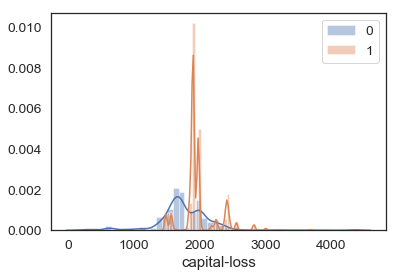

In [102]:
sns.distplot(train['capital-loss'][(train['income']==0) & (train['capital-loss']!=0)], label='0')
sns.distplot(train['capital-loss'][(train['income']==1) & (train['capital-loss']!=0)], label='1')
plt.legend()

-  capital-loss는 capital-gain보다 0그룹과 1그룹의 차이가 확연하게 나타나지 않아 사용하지 않음 

## hours-per-week (주당근무시간)

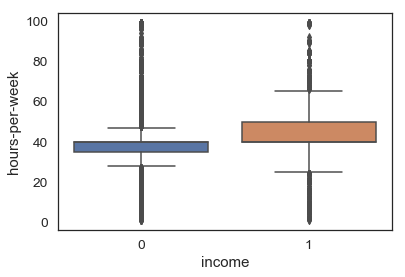

In [103]:
sns.boxplot(train['income'], train['hours-per-week'])

In [104]:
train['hours-per-week'][(train['income']==1)].describe()

count    7045.000000
mean       45.505039
std        11.069492
min         1.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: hours-per-week, dtype: float64

In [105]:
train['hours-per-week'][(train['income']==0)].describe()

count    22260.000000
mean        38.837107
std         12.278957
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours-per-week, dtype: float64

- 50k이상 벌어 들이는 사람들의 주당 근무 시간이 더 길다. 
- 50k이상 벌어들이는 사람들의 평균 근무 시간은 45시간 정도 이하는 38시간 정도 일을 한다. 
- 0, 1그룹의 중앙값과 1사분위수, 3사분위수가 40으로 나올 정도로 40시간 근무를 하는 사람의 비율이 높은 것을 볼 수 있습니다.

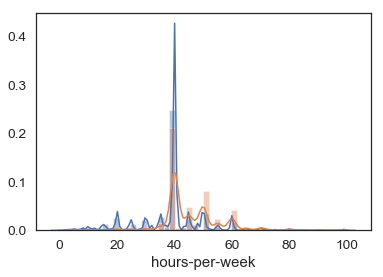

In [106]:
sns.distplot(train['hours-per-week'][(train['income']==0)])
sns.distplot(train['hours-per-week'][(train['income']==1)])

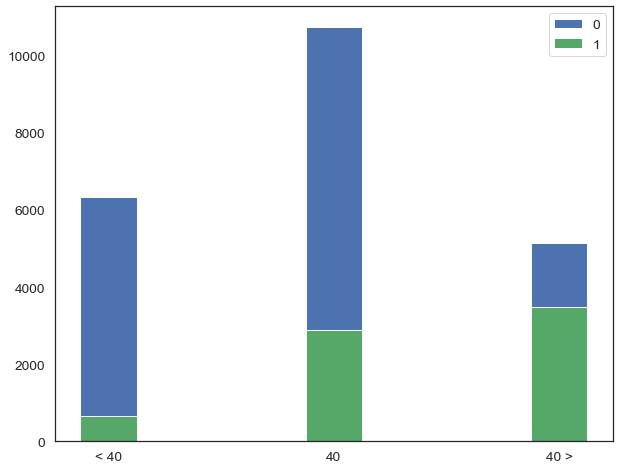

In [81]:
hpw0 = pd.cut(train['hours-per-week'][train['income']==0], [-1, 39, 40, 100], labels=['< 40','40', '40 >']).value_counts().sort_index()
hpw1 = pd.cut(train['hours-per-week'][train['income']==1], [-1, 39, 40, 100], labels=['< 40','40', '40 >']).value_counts().sort_index()
plt.figure(figsize=(10,8))
plt.bar(['< 40','40', '40 >'], hpw0, color = 'b', width = 0.25, label='0')
plt.bar(['< 40','40', '40 >'], hpw1, color = 'g', width = 0.25, label='1')
plt.legend()

- 40시간 근무의 비중이 매우 높지만, 40시간 근무를 기준으로 40시간 이하 근무는 0그룹의 비중이 높았고, 40시간 이상 근무는 1그룹의 비중이 높은 것을 볼 수 있었습니다.

## 범주형 변수들

## workclass

In [107]:
wc = pd.DataFrame([train['workclass'][train['income']==0].value_counts().sort_index(), train['workclass'][train['income']==1].value_counts().sort_index()], index=[0,1])

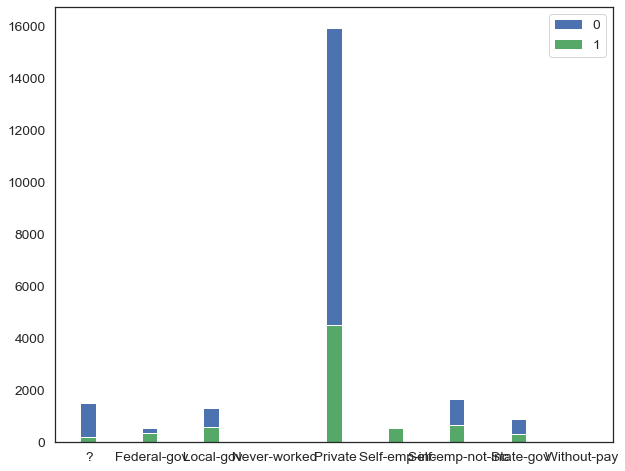

In [130]:
plt.figure(figsize=(10,8))
plt.bar(wc.columns, wc.iloc[0,:], color = 'b', width = 0.25, label='0')
plt.bar(wc.columns, wc.iloc[1,:], color = 'g', width = 0.25, label='1')
plt.legend()

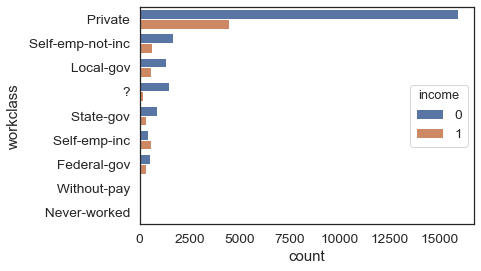

In [167]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='workclass', hue='income', data = pd.concat([cat_attributes, y], axis=1))

- 범주형 데이터기 때문에 one-hot-encoding사용 

In [139]:
one_hot_wc = pd.get_dummies(train[['workclass', 'income']])

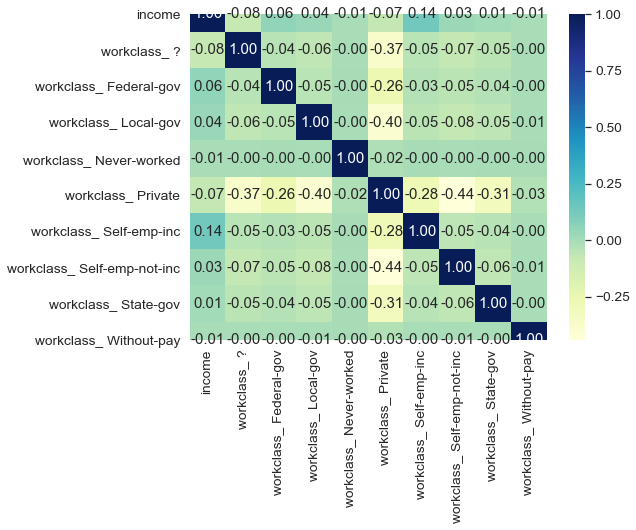

In [141]:
plt.figure(figsize=(8,6))
sns.heatmap(one_hot_wc.corr(), fmt='.2f', annot=True, cmap="YlGnBu")

> workclass의 요소들을 One-Hot-Encoding 한 후 income과의 상관관계를 히트맵으로 살펴본 결과 <br>
모든 요소들의 상관관계가 거의 없다고 봐도 될 정도로 나타났습니다.

## education

In [107]:
# education 열은 education으로 대체 가능
train.sort_values('education-num').loc[:,'education':'education-num'].drop_duplicates()

,education,education-num
28001,Preschool,1
24025,1st-4th,2
7908,5th-6th,3
19344,7th-8th,4
12339,9th,5
3658,10th,6
5991,11th,7
19550,12th,8
11361,HS-grad,9
4700,Some-college,10


> education과 education-num을 쌍으로 묶어 중복을 제거한 결과 <br>
education과 education-num이 일대일 대응 관계인 것을 볼 수 있었습니다.

## marital-status

Divorced  : 이혼 <br>
Married-AF-spouse : 기혼 - 배우자가 군복무중으로  떨어져 생활하고 있는 경우 <br>
Married-civ-spouse : 기혼 - 배우자가 민간인인 경우 <br>
Married-spouse-absent : 기혼 - 배우자가 직업상의 이유로 떨어져 사는 경우 <br>
Never-married : 미혼 <br>
Separated : 별거 <br>
Widowed : 사별

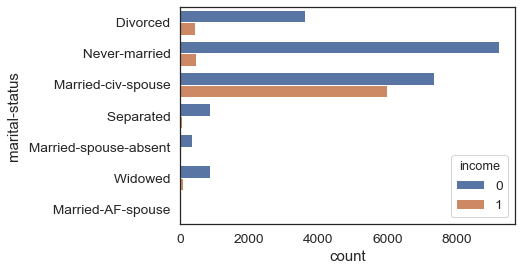

In [172]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='marital-status', hue='income', data = pd.concat([cat_attributes, y], axis=1))

In [126]:
relation_income1 = train[train['income'] == 1]['marital-status'].value_counts()
relation_income0 = train[train['income'] == 0]['marital-status'].value_counts()

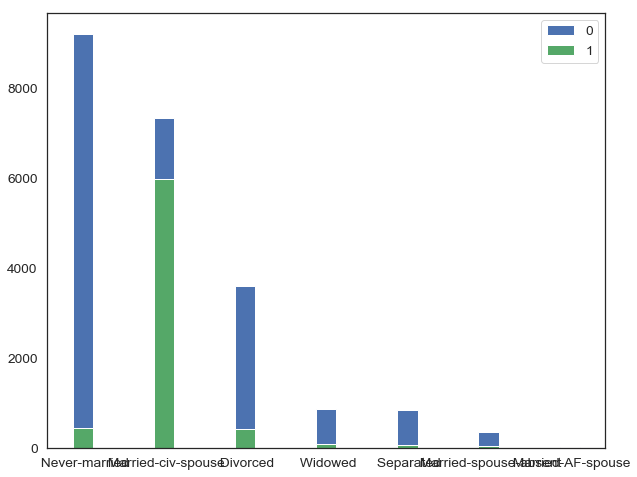

In [128]:
plt.figure(figsize=(10,8))
plt.bar(relation_income0.keys(), relation_income0.values, color = 'b', width = 0.25, label='0')
plt.bar(relation_income1.keys(), relation_income1.values, color = 'g', width = 0.25, label='1')
plt.legend()

-  married-civ-spouse(일반인과 결혼한 사람) 외에 다른사람들은 0의 비율이 대다수로 보인다.
- 이 결과로 married-civ-spouse을 1로 이외의 값들을 0으로 지정해주었다. 

In [142]:
one_hot_ms = pd.get_dummies(train[['marital-status', 'income']])

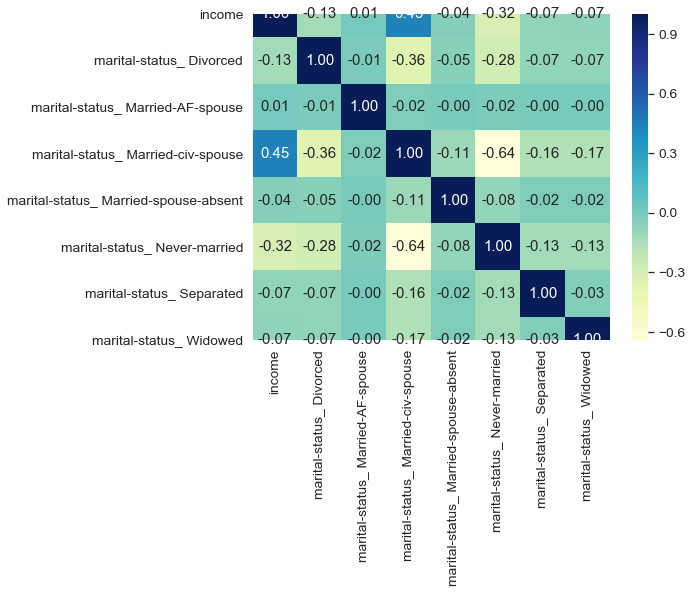

In [143]:
plt.figure(figsize=(8,6))
sns.heatmap(one_hot_ms.corr(), fmt='.2f', annot=True, cmap="YlGnBu")

> marital-status의 요소들을 One-Hot-Encoding 한 후 income과의 상관관계를 히트맵으로 살펴본 결과 <br>
Married-civ-spouse(배우자가 직업상의 이유로 떨어져 사는 경우)와 Never-married(미혼) 속성과의 상관관계가 높은 것을 확인할 수 있었습니다.

In [142]:
one_hot_ms = pd.get_dummies(train[['marital-status', 'income']])

## occupation

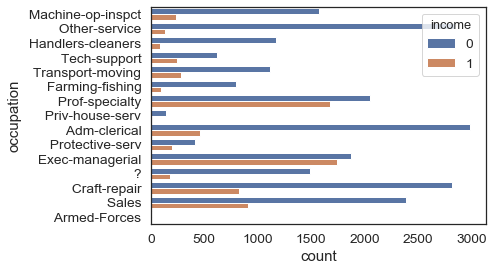

In [168]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='occupation', hue='income', data = pd.concat([cat_attributes, y], axis=1))

In [144]:
one_hot_occ = pd.get_dummies(train[['occupation', 'income']])

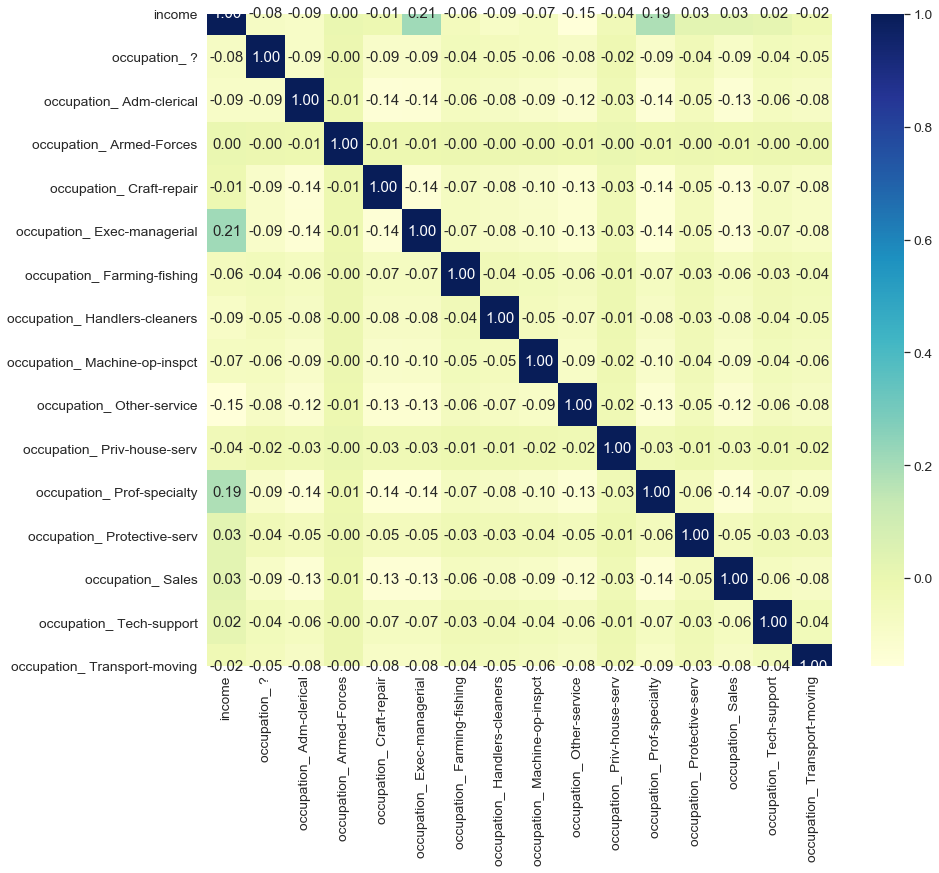

In [146]:
plt.figure(figsize=(14,12))
sns.heatmap(one_hot_occ.corr(), fmt='.2f', annot=True, cmap="YlGnBu")

> occupation의 요소들을 One-Hot-Encoding 한 후 income과의 상관관계를 히트맵으로 살펴본 결과 <br>
Exec-managerial과 Prof-specialty 속성과의 상관관계가 높은 것을 확인할 수 있었습니다.

## relationship

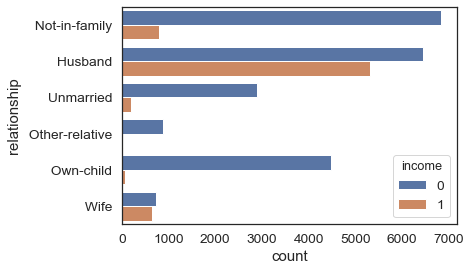

In [171]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='relationship', hue='income', data = pd.concat([cat_attributes, y], axis=1))

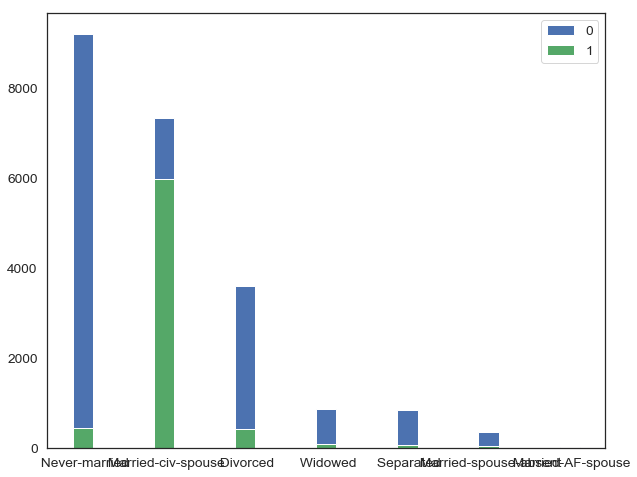

In [129]:
plt.figure(figsize=(10,8))
plt.bar(relation_income0.keys(), relation_income0.values, color = 'b', width = 0.25, label='0')
plt.bar(relation_income1.keys(), relation_income1.values, color = 'g', width = 0.25, label='1')
plt.legend()

- Husband와 wife의 50k이상의 비중이 높았기 때문에 1로 두었고 나머지는 0으로 라벨링 하였습니다. 

In [147]:
one_hot_rs = pd.get_dummies(train[['relationship', 'income']])

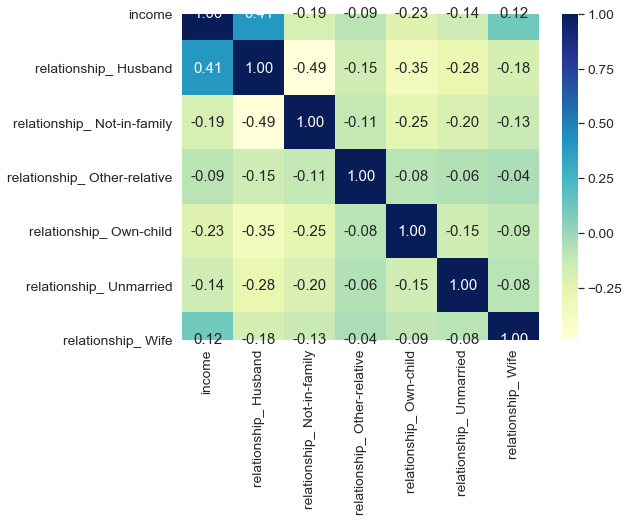

In [148]:
plt.figure(figsize=(8,6))
sns.heatmap(one_hot_rs.corr(), fmt='.2f', annot=True, cmap="YlGnBu")

> one-hot 인코딩을 적용한 후의 상관관계에서 Husband 속성이 높은 상관관계를 가지고 있는 것을 확인할 수 있습니다.

## race

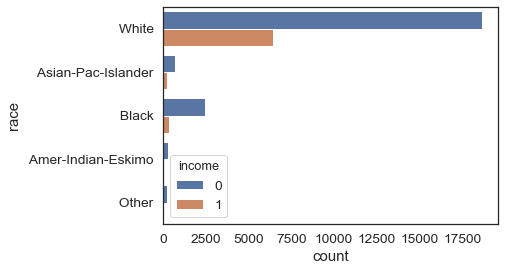

In [170]:
cat_attributes = train.select_dtypes(include=['object'])
sns.countplot(y='race', hue='income', data = pd.concat([cat_attributes, y], axis=1))

In [149]:
one_hot_race = pd.get_dummies(train[['race', 'income']])

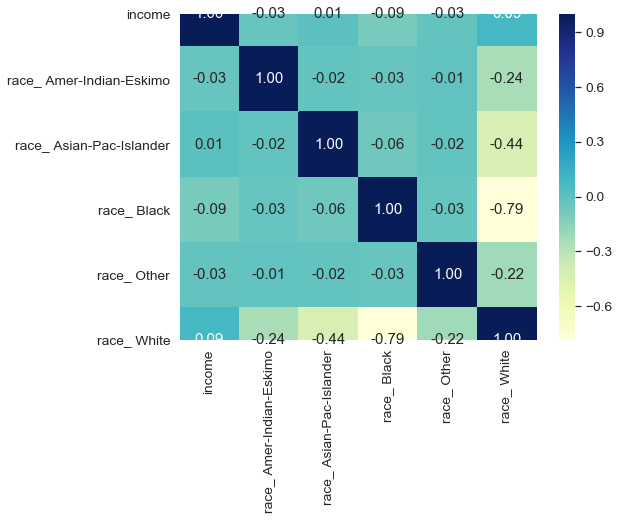

In [150]:
plt.figure(figsize=(8,6))
sns.heatmap(one_hot_race.corr(), fmt='.2f', annot=True, cmap="YlGnBu")

> one-hot 인코딩 이후 히트맵으로 상관관계를 시각화해본 결과 <br>
모든 속성의 income과의 상관관계가 약한 것을 볼 수 있었습니다.

## sex

In [152]:
train['sex'].value_counts()

 Male      19621
 Female     9684
Name: sex, dtype: int64

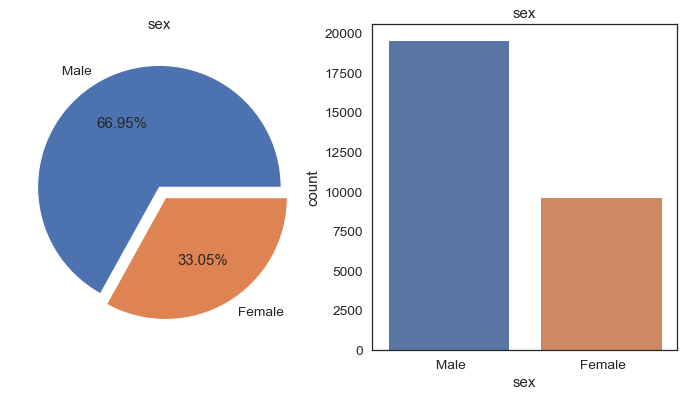

In [153]:
f, ax = plt.subplots(1,2,figsize=(12,6))

train['sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('sex')
ax[0].set_ylabel('')

sns.countplot('sex', data=train, ax=ax[1])
ax[1].set_title('sex')
plt.show()

In [190]:
one_hot_sex = pd.get_dummies(train[['sex', 'income']])

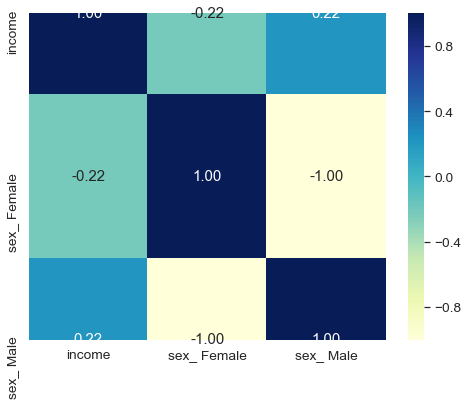

In [191]:
plt.figure(figsize=(8,6))
sns.heatmap(one_hot_sex.corr(), fmt='.2f', annot=True, cmap="YlGnBu")

> one-hot 인코딩 후 income과의 상관관계를 살펴본 결과 <br>
income과 어느정도 상관관계가 있는 것을 파악할 수 있었습니다.

## native-country

In [162]:
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
 ?                               495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Columbia                         53
 Poland                           53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 

Text(0, 0.5, '')

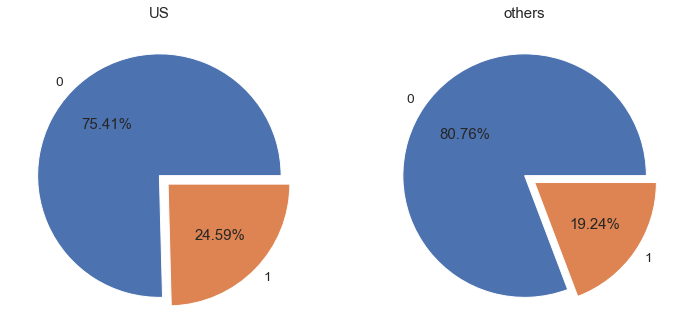

In [168]:
f, ax = plt.subplots(1,2,figsize=(12,6))

train['income'][train['native-country']==' United-States'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('US')
ax[0].set_ylabel('')

train['income'][train['native-country']!=' United-States'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[1])
ax[1].set_title('others')
ax[1].set_ylabel('')

- 총 29305명 중 26301명이(약 90%) 미국인이었습니다.
- 미국인과 비 미국인의 0, 1그룹 비율은 크게 다르지 않았습니다.

In [172]:
object_columns = train.select_dtypes(include = ["object"]).columns
Numeric_columns = train.select_dtypes(include = ["int64"]).columns

## 결측치

In [176]:
train[Numeric_columns].isnull().sum().sort_values(ascending=False)

income            0
hours-per-week    0
capital-loss      0
capital-gain      0
education-num     0
fnlwgt            0
age               0
no                0
dtype: int64

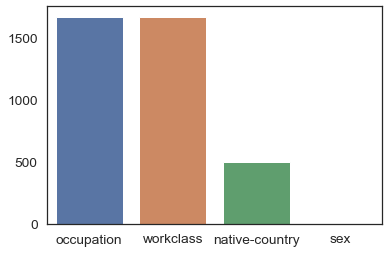

In [187]:
sns.barplot((train[object_columns]==' ?').sum().sort_values(ascending=False)[:4].keys(),(train[object_columns]==' ?').sum().sort_values(ascending=False)[:4])

- occupation, workclass, native-country column에 ?로 된 결측치가 존재

### train과 test 데이터 분포 비교

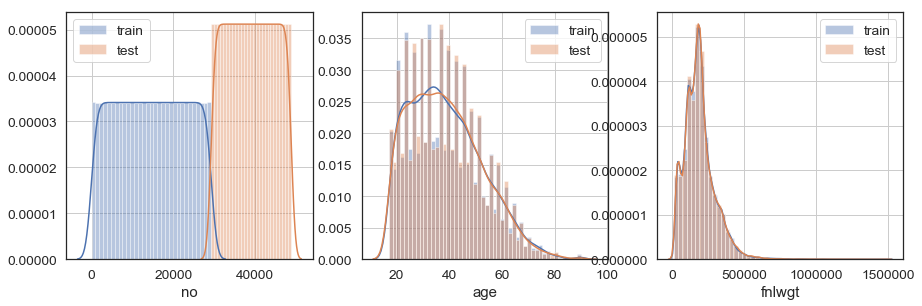

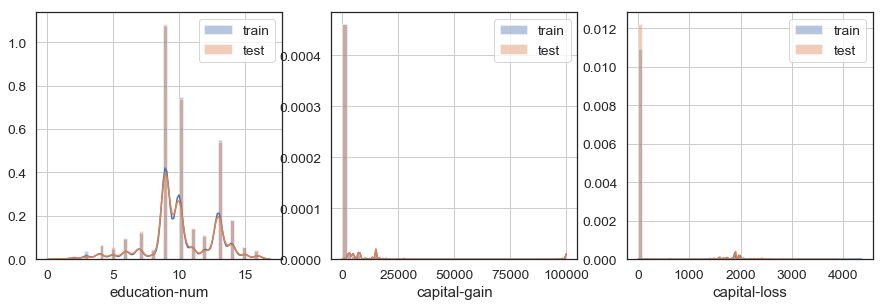

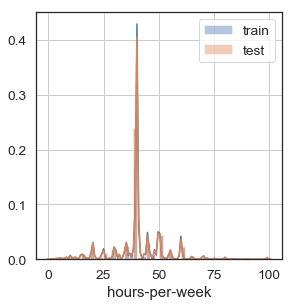

In [121]:
tmp_train = train.copy()
del tmp_train['income']
Numeric_columns = tmp_train.select_dtypes(include = ["int64","float64"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Numeric_columns):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(tmp_train[c].dropna())
            sns.distplot(test[c].dropna())
            plt.legend(['train', 'test'])
            plt.grid()            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1
del tmp_train

In [189]:
test.shape, train.shape

((19537, 15), (29305, 16))

>train dataset과 test dataset의 크기가 큰 편이고, 둘의 데이터 분포도 거의 동일하기 때문에 Train data를 이용하여 모델을 훈련 시키는 것으로 test 데이터의 결과를 예측하는데 큰 문제는 없을 것이라고 생각됩니다.

# 데이터 전처리

## 반응 변수
## income

- 0과 1로 이뤄진 이진 형태이므로 별다른 전처리를 하지 않았습니다.

## 범주형 변수

#### one-hot 인코딩을 통해 income과의 상관관계를 확인한 후 사용 여부를 결정하였습니다.
- workclass는 income과의 상관관계가 확실한 요소가 없었기 때문에 사용하지 않았습니다.
- education은 education-num과 같은 의미를 갖기 때문에 제거하였습니다.
- marital-status는 Married-civ-spouse(배우자가 직업상의 이유로 떨어져 사는 경우)와 Never-married(미혼) 속성이 income과의 상관관계가 있는 것으로 보입니다. 하지만 두 속성간에 음의 상관관계가 존재하기 때문에 둘중 Married-civ-spouse만 1로 설정하고 나머지 속성들은 0으로 라벨링 하였습니다.
- occupation은 다른 속성에 비해 상관계수가 높은 편인 Exec-managerial과 Prof-specialty 속성을 사용하였습니다.
- relationship은 husband와 wife의 값을 1로, 나머지 속성들은 0으로 라벨링 하였습니다.
- race는 모든 속성들이 income과의 상관관계가 약해 제외시켰습니다.
- sex는 one-hot 인코딩을 사용하였습니다.
- native-country는 대다수가 미국인이고 내부의 분포도 비슷하여 훈련에 사용되는 속성에서 제외시켰습니다.

## 수치형 변수

- age, education-num, capital-gain, hours-per-week는 income과의 상관관계가 있음을 이미 확인하였기 때문에 훈련에 사용했습니다.
- fnlwgt(final weight)는 의미가 모호하고 income과의 상관관계도 명확하지 않아 배제하였습니다.
- capital-loss는 capital-gain만큼 0, 1그룹에서의 차이가 보이지 않기 때문에 사용하지 않았습니다.
- **범주형 변수에서 one-hot 인코딩을 사용했기 때문에 수치형 변수들도 0~1 범위내에 들어가도록 MinMax 스케일링을 적용하였습니다.**